In [1]:
from qiskit_ibm_runtime import QiskitRuntimeService
 
service = QiskitRuntimeService()
backend = service.least_busy(
    operational=True, simulator=False, min_num_qubits=127
)

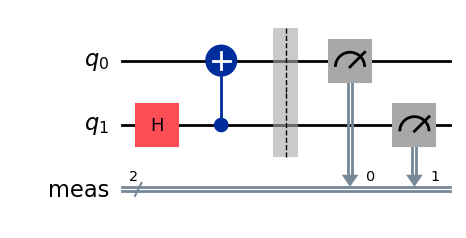

In [12]:
from component.b_benchmark.mqt_tool import benchmark_circuit
import numpy as np

circuit = benchmark_circuit(name_algorithm="str", circuit_size=2)
param_values = np.random.rand(circuit.num_parameters)
circuit.draw("mpl")


In [6]:
from qiskit.transpiler import generate_preset_pass_manager
 
pm = generate_preset_pass_manager(optimization_level=1, backend=backend)
isa_circuit = pm.run(circuit)
print(f">>> Circuit ops (ISA): {isa_circuit.count_ops()}")

>>> Circuit ops (ISA): OrderedDict([('rz', 3), ('sx', 2), ('measure', 2), ('ecr', 1), ('x', 1), ('barrier', 1)])


In [7]:
from qiskit_ibm_runtime import SamplerV2 as Sampler
 
sampler = Sampler(mode=backend)

In [8]:
job = sampler.run([(isa_circuit, param_values)])
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

>>> Job ID: d03xz24qnmvg0082f9ag
>>> Job Status: QUEUED


In [9]:
result = job.result()
 
# Get results for the first (and only) PUB
pub_result = result[0]
print(
    f"Counts for the 'meas' output register: {pub_result.data.meas.get_counts()}"
)

Counts for the 'meas' output register: {'01': 91, '11': 1965, '10': 197, '00': 1843}


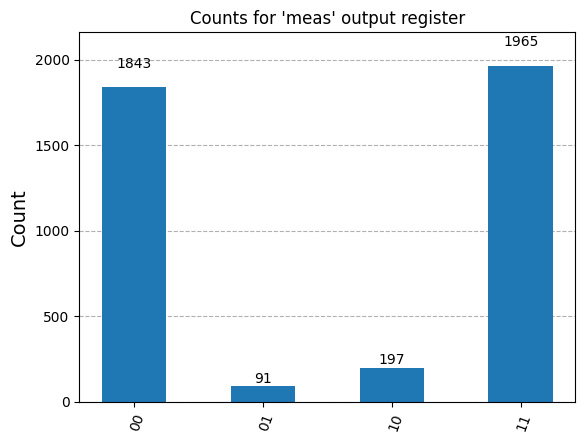

In [10]:
from qiskit.visualization import plot_histogram

plot_histogram(pub_result.data.meas.get_counts(), title="Counts for 'meas' output register")

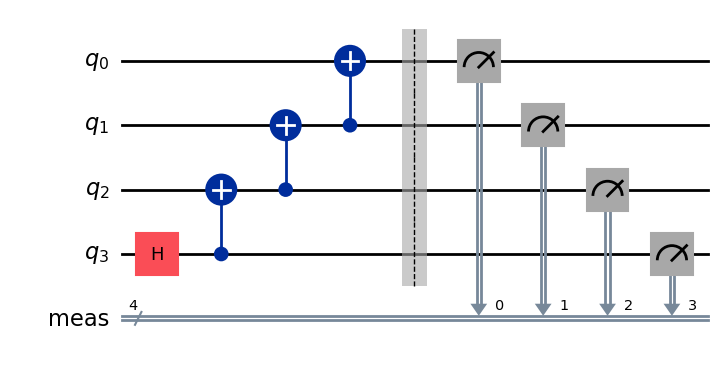

In [13]:
from component.b_benchmark.mqt_tool import benchmark_circuit
import numpy as np

circuit0 = benchmark_circuit(name_algorithm="str", circuit_size=4)
param_values = np.random.rand(circuit0.num_parameters)
circuit0.draw("mpl")

In [14]:
from qiskit.transpiler import generate_preset_pass_manager
 
pm = generate_preset_pass_manager(optimization_level=1, backend=backend)
isa_circuit = pm.run(circuit0)
print(f">>> Circuit ops (ISA): {isa_circuit.count_ops()}")

>>> Circuit ops (ISA): OrderedDict([('rz', 11), ('sx', 7), ('measure', 4), ('ecr', 3), ('x', 2), ('barrier', 1)])


In [15]:
from qiskit_ibm_runtime import SamplerV2 as Sampler
 
sampler = Sampler(mode=backend)

In [16]:
job0 = sampler.run([(isa_circuit, param_values)])
print(f">>> Job ID: {job0.job_id()}")
print(f">>> Job Status: {job0.status()}")

>>> Job ID: d03y1hyrxz8g008g3yd0
>>> Job Status: QUEUED


In [ ]:
result0 = job0.result()
 
# Get results for the first (and only) PUB
pub_result0 = result0[0]
print(
    f"Counts for the 'meas' output register: {pub_result0.data.meas.get_counts()}"
)

Counts for the 'meas' output register: {'1010': 5, '1111': 1867, '0000': 1665, '1000': 61, '0010': 107, '1011': 60, '0100': 99, '0111': 64, '1100': 53, '1101': 26, '0011': 27, '0110': 12, '0001': 18, '1001': 3, '1110': 27, '0101': 2}


In [21]:
counts = pub_result0.data.meas.get_counts()

print(counts)


{'1010': 5, '1111': 1867, '0000': 1665, '1000': 61, '0010': 107, '1011': 60, '0100': 99, '0111': 64, '1100': 53, '1101': 26, '0011': 27, '0110': 12, '0001': 18, '1001': 3, '1110': 27, '0101': 2}


In [23]:
# output: counts
# {'1010': 5, '1111': 1867, '0000': 1665, '1000': 61, '0010': 107, '1011': 60, '0100': 99, '0111': 64, '1100': 53, '1101': 26, '0011': 27, '0110': 12, '0001': 18, '1001': 3, '1110': 27, '0101': 2}
# Divide counts into count1 and count2
count1 = {}
count2 = {}

for key, value in counts.items():
    count1_key = key[:2]  # First 2 bits
    count2_key = key[-2:]  # Last 2 bits

    count1[count1_key] = count1.get(count1_key, 0) + value
    count2[count2_key] = count2.get(count2_key, 0) + value

print("Count1:", count1)
print("Count2:", count2)


Count1: {'10': 129, '11': 1973, '00': 1817, '01': 177}
Count2: {'10': 151, '11': 2018, '00': 1878, '01': 49}


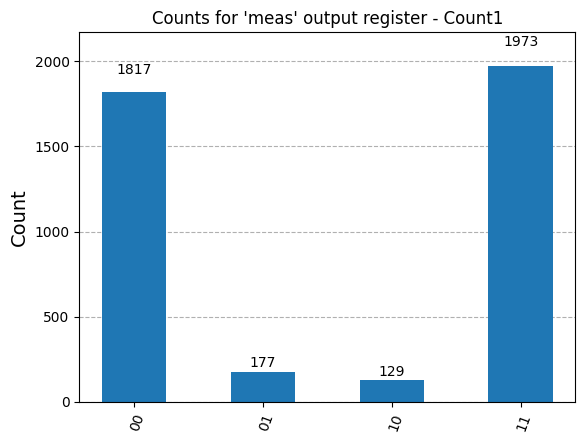

In [24]:
plot_histogram(count1, title="Counts for 'meas' output register - Count1")

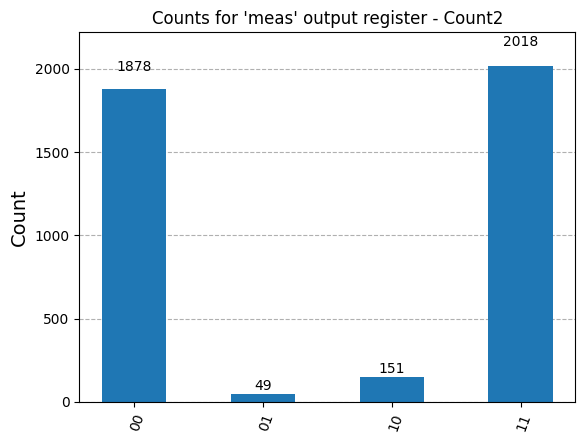

In [25]:
plot_histogram(count2, title="Counts for 'meas' output register - Count2")

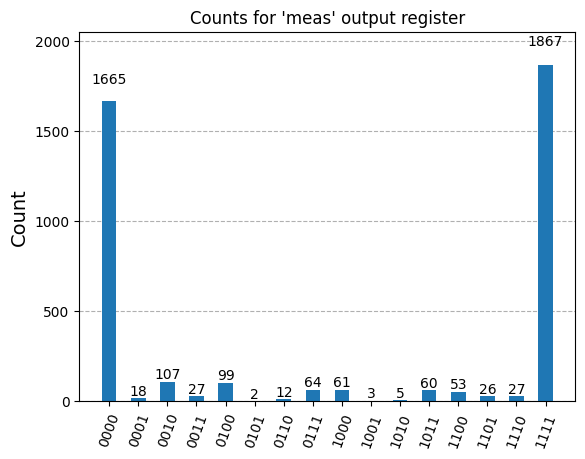

In [18]:
plot_histogram(
    pub_result0.data.meas.get_counts(), title="Counts for 'meas' output register"
)